# Captioning on ADCD enviorments of Calvin

In [2]:
import numpy as np
import cv2
import config as CFG
import matplotlib.pyplot as plt
from PIL import Image
import yaml
from utils.visualize import visualize, showImages

Enviorment:  calvin_scene_B
Caption:  grasp the door handle, then slide the door to the left


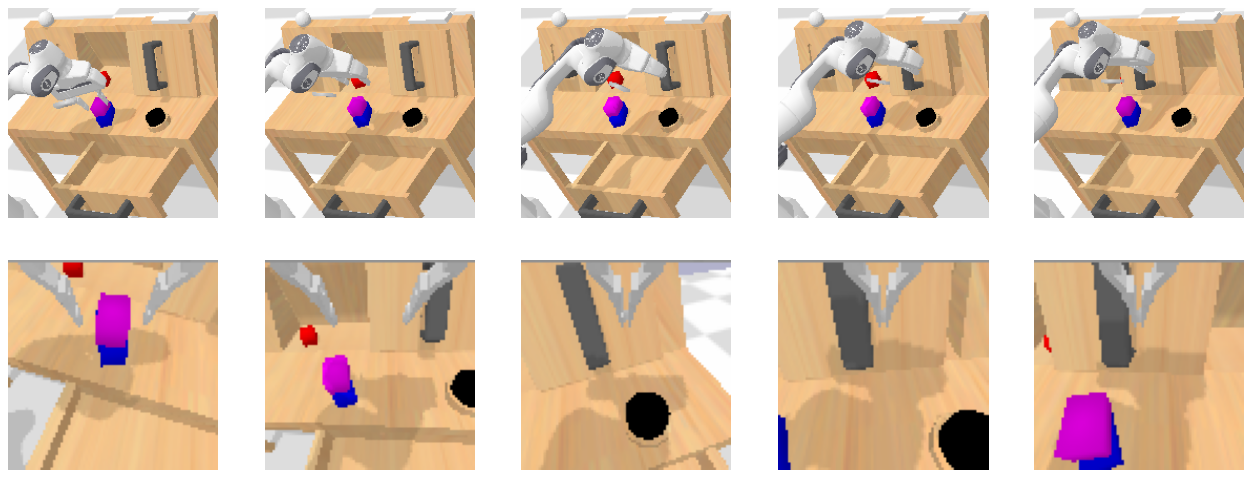

Caption count for enviornment: calvin_scene_B  :  13  


Enviorment:  calvin_scene_C
Caption:  grasp the door handle, then slide the door to the left


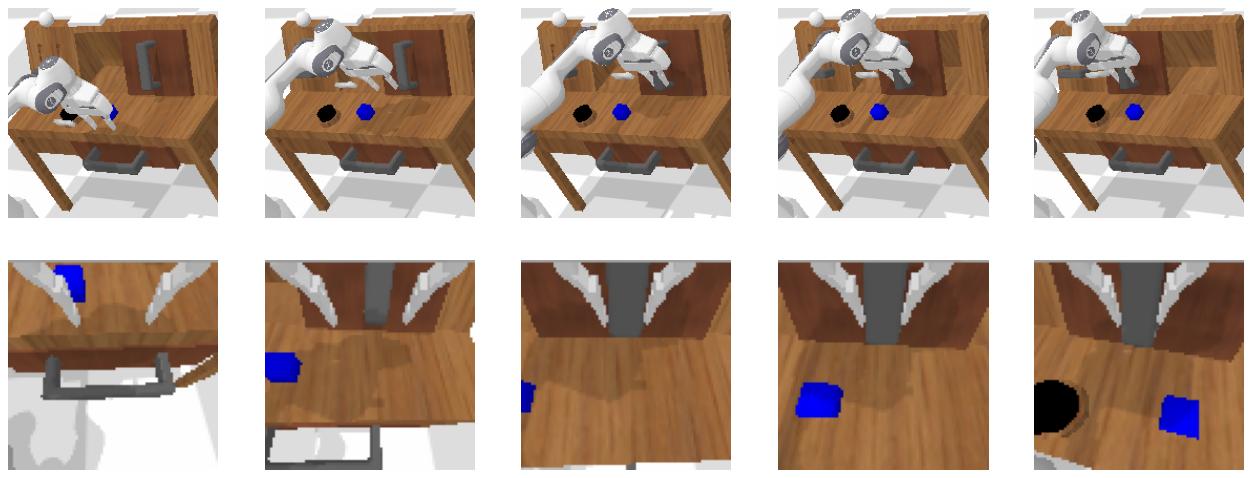

Caption count for enviornment: calvin_scene_C  :  15  


Enviorment:  calvin_scene_A
Caption:  grasp the door handle, then slide the door to the left


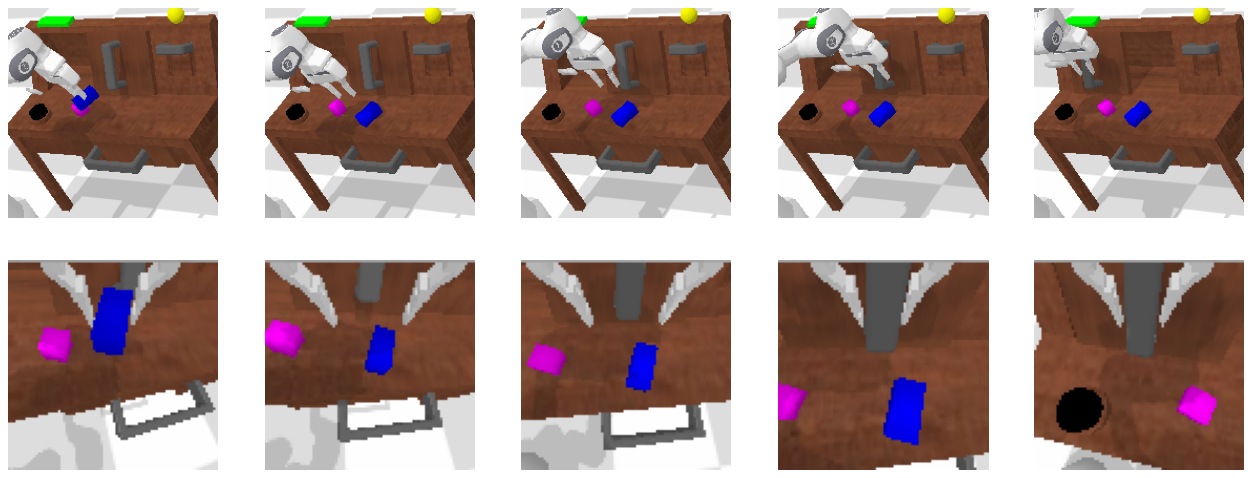

Caption count for enviornment: calvin_scene_A  :  9  


Enviorment:  calvin_scene_D_validation
Caption:  grasp the door handle, then slide the door to the left


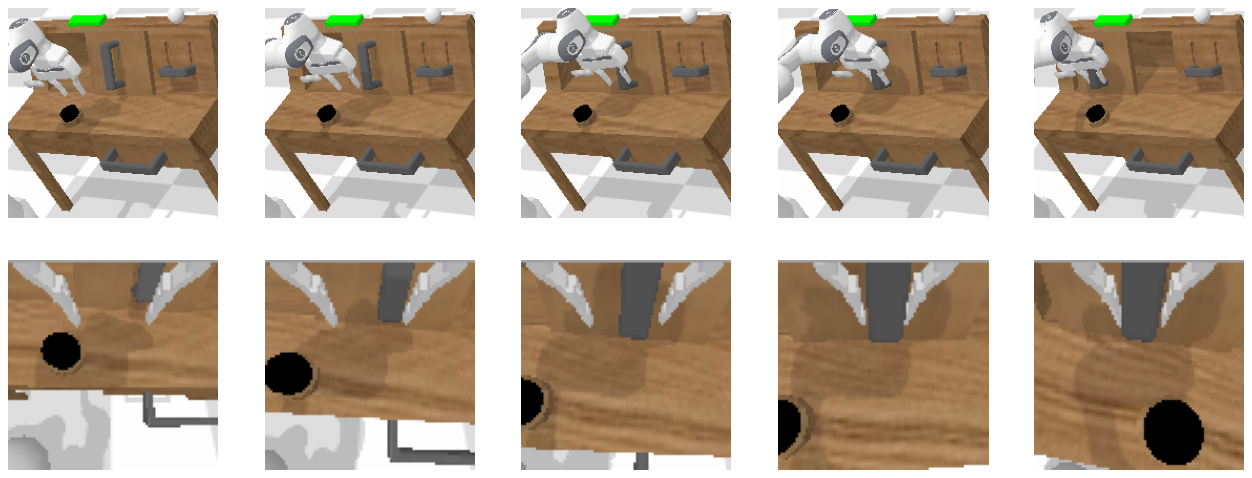

Caption count for enviornment: calvin_scene_D_validation  :  3  




In [4]:

def show_ann_for_env(ann, env, index, path):
        print('Enviorment: ', env)
        print('Caption: ', ann)
        counter = 0
        first = True
        annotations = np.load('{}/lang_annotations/auto_lang_ann.npy'.format(path), allow_pickle=True).item()
        annotations = list(zip(annotations["info"]["indx"], annotations["language"]["ann"]))
        for annotation in annotations:
                if annotation[1] != ann:
                        continue
                if not (index[0] <= annotation[0][0] and annotation[0][1] <= index[1]):
                        continue
                if first:
                        showImages(annotation[0][0], path)
                       # showImages(annotation[0][0], path, range=[0, 8, 16, 24, 32, 40, 48, 56, 64])
                first = False
                counter += 1
        print('Caption count for enviornment:', env, ' : ', counter, ' \n\n')

path = CFG.datapath_training_abcd
scene_info = np.load('{}/scene_info.npy'.format(path), allow_pickle=True).tolist()
for env, index in scene_info.items():
        target_ann = "grasp the door handle, then slide the door to the left"
        show_ann_for_env(target_ann, env, index, path)

path = CFG.datapath_val_abcd
# scene_info = np.load('{}/scene_info.npy'.format(path), allow_pickle=True).tolist()
# for env, index in scene_info.items():
target_ann = "grasp the door handle, then slide the door to the left"
show_ann_for_env(target_ann, "calvin_scene_D_validation", (0, 10000000), path)



## Get test images for Grounded Dino

[0, 598909]


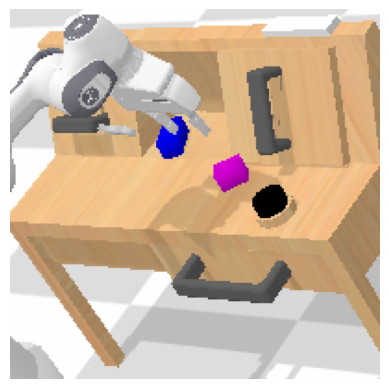

[598910, 1191338]


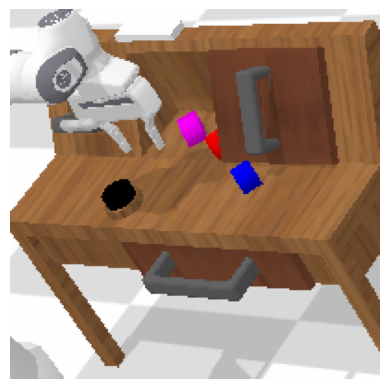

[1191339, 1795044]


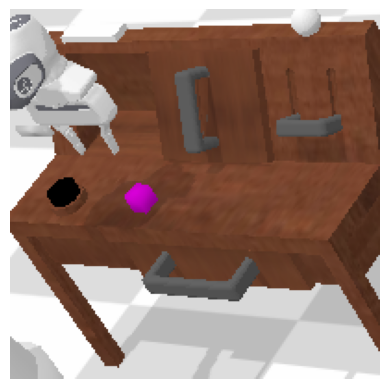

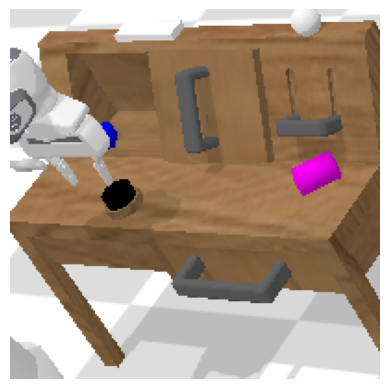

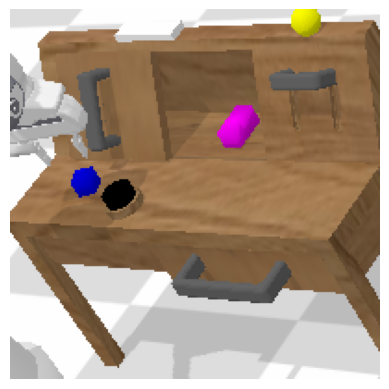

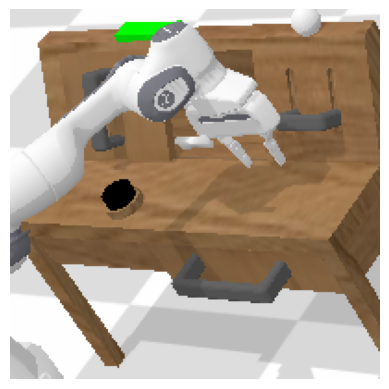

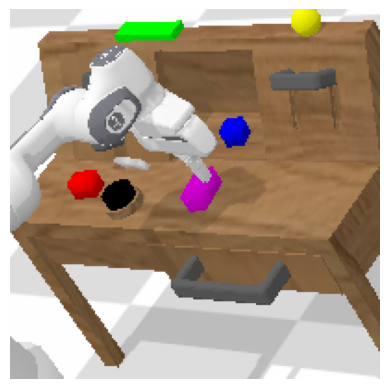

In [4]:

def show_img(index, env, path):
        frame = np.load(f"{path}/episode_{index:07d}.npz", allow_pickle=True)
        img = frame["rgb_static"]
        plt.imshow(img)
        plt.axis('off')
        plt.savefig(f"scene_image_examples/{env}.png", bbox_inches='tight')
        plt.show()

path = CFG.datapath_training_abcd
scene_info = np.load('{}/scene_info.npy'.format(path), allow_pickle=True).tolist()
for env, index in scene_info.items():
        print(index)
        show_img(index[0], env, CFG.datapath_training_abcd)
        
path = CFG.datapath_val_abcd
show_img(0, 'calvin_scene_D', path)
show_img(1000, 'calvin_scene_D', path)
show_img(2000, 'calvin_scene_D', path)
show_img(3000, 'calvin_scene_D', path)


Hulc 2 Real World

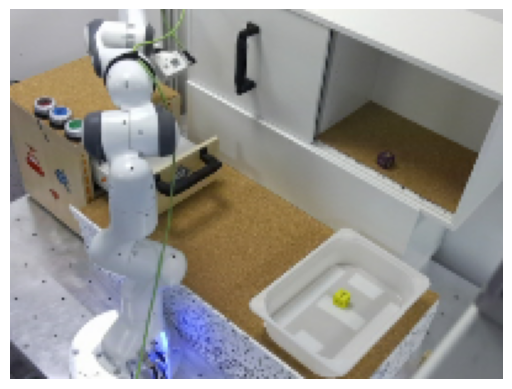

In [24]:

path = '/media/tim/E/hulc_2_real'
frame = np.load("/media/tim/E/episode_0014233.npz", allow_pickle=True)
img = frame["rgb_static"]
plt.imshow(img)
plt.axis('off')
plt.savefig("real_world_hulc_2.png", bbox_inches='tight')
plt.show()


## Videos of enviornments

In [14]:
def get_index_at_caption(ann, index, path):
        annotations = np.load('{}/lang_annotations/auto_lang_ann.npy'.format(path), allow_pickle=True).item()
        annotations = list(zip(annotations["info"]["indx"], annotations["language"]["ann"]))
        for annotation in annotations:
                if annotation[1] != ann:
                        continue
                if not (index[0] <= annotation[0][0] and annotation[0][1] <= index[1]):
                        continue
                return (annotation[0][0], path)
        
def get_indices_at_caption(ann, index, path, num=5):
        annotations = np.load('{}/lang_annotations/auto_lang_ann.npy'.format(path), allow_pickle=True).item()
        annotations = list(zip(annotations["info"]["indx"], annotations["language"]["ann"]))
        counter = 0
        result_arr = []
        for annotation in annotations:
                if annotation[1] != ann:
                        continue
                if not (index[0] <= annotation[0][0] and annotation[0][1] <= index[1]):
                        continue
                result_arr.append((annotation[0][0], path))
                counter += 1
                if counter >= num: 
                        return result_arr
        return result_arr

def create_video(indices, name):
        fourcc = cv2.VideoWriter_fourcc(*'XVID')    
        out = cv2.VideoWriter(f'videos/{name}.avi', fourcc, 20.0, (1600,800))    
        for i in range(0,64):
                plt.figure(figsize=(2, 1), dpi=800)
                plot_index = 1
                for d in ["rgb_static", "rgb_gripper"]:
                        for index in indices:
                                frame = np.load(f"{index[1]}/episode_{index[0]+i:07d}.npz", allow_pickle=True)
                                img = frame[d]
                                plt.subplot(2, 4, plot_index)
                                plt.axis('off')
                                plt.imshow(img)
                                plot_index += 1

               # plt.savefig('videos/temp_image.png')     
               # img = cv2.imread('videos/temp_image.png') 
                fig = plt.gcf()
                fig.canvas.draw()
                img = np.array(fig.canvas.renderer.buffer_rgba())
                img = cv2.cvtColor(img[:, :, :3], cv2.COLOR_RGB2BGR)
               # print(img.shape)
                out.write(img)
                plt.close()
        out.release()

In [51]:
target_anns = [('move_slider_left', "grasp the door handle, then slide the door to the left"),
               ("rotate_red_block_right", 'grasp the red block, then rotate it right'),
               ("push_pink_block_right", 'go push the pink block to the right'),
               ("close_drawer", 'close the drawer'),
               ("place_in_slider", 'place the block in the sliding cabinet'),
               ("turn_on_lightbulb", 'turn on the light bulb'),
               ("turn_off_led", 'turn off the led lamp')]

for ann in target_anns:
        path = CFG.datapath_training_abcd
        scene_info = np.load('{}/scene_info.npy'.format(path), allow_pickle=True).tolist()
        indices = []
        for env, index in scene_info.items():
                index = get_index_at_caption(ann[1], index, path)
                indices.append(index)
        path = CFG.datapath_val_abcd
        index = get_index_at_caption(ann[1], (0, 10000000), path)
        indices.append(index)
        print(indices)
        create_video(indices, ann[0])


# path = CFG.datapath_val_abcd
# scene_info = np.load('{}/scene_info.npy'.format(path), allow_pickle=True).tolist()
# for env, index in scene_info.items():
# target_ann = "grasp the door handle, then slide the door to the left"
# show_ann_for_env(target_ann, "calvin_scene_D_validation", (0, 10000000), path)


[(90670, '/media/tim/E/task_ABC_D/training'), (695095, '/media/tim/E/task_ABC_D/training'), (1342758, '/media/tim/E/task_ABC_D/training'), (1872, '/media/tim/E/task_ABC_D/validation')]
[(94207, '/media/tim/E/task_ABC_D/training'), (637840, '/media/tim/E/task_ABC_D/training'), (1432107, '/media/tim/E/task_ABC_D/training'), (13018, '/media/tim/E/task_ABC_D/validation')]
[(10459, '/media/tim/E/task_ABC_D/training'), (1051116, '/media/tim/E/task_ABC_D/training'), (1269338, '/media/tim/E/task_ABC_D/training'), (34355, '/media/tim/E/task_ABC_D/validation')]
[(257858, '/media/tim/E/task_ABC_D/training'), (806230, '/media/tim/E/task_ABC_D/training'), (1196242, '/media/tim/E/task_ABC_D/training'), (1717, '/media/tim/E/task_ABC_D/validation')]
[(213579, '/media/tim/E/task_ABC_D/training'), (1114422, '/media/tim/E/task_ABC_D/training'), (1729456, '/media/tim/E/task_ABC_D/training'), (2200, '/media/tim/E/task_ABC_D/validation')]
[(545129, '/media/tim/E/task_ABC_D/training'), (915622, '/media/tim/E

## start and end panels per task
code to get better formated result in next cell

In [60]:
target_anns = [('move_slider_left', "grasp the door handle, then slide the door to the left"),
               ("rotate_red_block_right", 'grasp the red block, then rotate it right'),
               ("push_pink_block_right", 'go push the pink block to the right'),
               ("close_drawer", 'close the drawer'),
               ("place_in_slider", 'place the block in the sliding cabinet'),
               ("turn_on_lightbulb", 'turn on the light bulb'),
               ("turn_off_led", 'turn off the led lamp')]

def show_first_and_last(ind_arr: [], filename: str, output_dir =  'img_first_last/'):
        image_final_static = np.array([])
        image_final_gripper = np.array([])
        for d in ["rgb_static", "rgb_gripper"]:
                for index in ind_arr:
                        frame = np.load(f"{index[1]}/episode_{index[0]:07d}.npz", allow_pickle=True)
                        img_first = frame[d]
                        image_pil = Image.fromarray(img_first)
                        image_pil = image_pil.resize((200, 200))
                        img_first = np.array(image_pil)
                        frame = np.load(f"{index[1]}/episode_{index[0]+64:07d}.npz", allow_pickle=True)
                        img_last = frame[d]
                        image_pil = Image.fromarray(img_last)
                        image_pil = image_pil.resize((200, 200))
                        img_last = np.array(image_pil)
                        image_combined = np.vstack((img_first, img_last))
                        if d == 'rgb_static':
                                if image_final_static.size == 0:
                                        image_final_static = image_combined
                                else:
                                        image_final_static = np.hstack((image_final_static, image_combined))
                        if d == 'rgb_gripper':
                                if image_final_gripper.size == 0:
                                        image_final_gripper = image_combined
                                else:
                                        image_final_gripper = np.hstack((image_final_gripper, image_combined))          

        image_final = np.vstack((image_final_static, image_final_gripper))
      #  plt.imshow(image_final)
      #  plt.axis('off')
      #  plt.show()
        output_file = f"{output_dir}/{filename}.png"
        plt.imsave(output_file, image_final)


path = CFG.datapath_training_abcd
scene_info = np.load('{}/scene_info.npy'.format(path), allow_pickle=True).tolist()
indices = []

for target_ann in target_anns:
        for env, index in scene_info.items():
                index = get_indices_at_caption(target_ann[1], index, path, 5)
                indices.append((index, env, target_ann[0]))

for env_indices in indices:
        filename = f'{env_indices[1]}_{env_indices[2]}'
        show_first_and_last(env_indices[0], filename)

#path = CFG.datapath_val_abcd
#index = get_index_at_caption(ann[1], (0, 10000000), path)
#indices.append(index)
#print(indices)
#create_video(indices, ann[0])


## start and end panels per task formated

In [149]:

#target_anns = [('move_slider_left', "grasp the door handle, then slide the door to the left", 0),
#               ("rotate_red_block_right", 'grasp the red block, then rotate it right', 0),
#               ("push_pink_block_right", 'go push the pink block to the right', 0),
#               ("close_drawer", 'close the drawer', 0),
#               ("place_in_slider", 'place the block in the sliding cabinet', 0),
#               ("turn_on_lightbulb", 'turn on the light bulb', 0),
#               ("turn_off_led", 'turn off the led lamp', 0)]

ann_yaml = './ann.yaml'
with open(ann_yaml, "r") as file:
    ann_data = yaml.safe_load(file)

for key, anns in ann_data.items():
        for i, ann in enumerate(anns):
                if i < 3:
                        item = (key, ann, i)
                        target_anns.append(item)

print(target_anns)

def show_first_and_last(ind_arr: []):
        for d in ["rgb_static", "rgb_gripper"]:
                image_first_final = np.array([])
                image_last_final = np.array([])

                for index in ind_arr:
                        # print(index)
                        frame = np.load(f"{index[1]}/episode_{index[0]:07d}.npz", allow_pickle=True)
                        img_first = frame[d]
                        image_pil = Image.fromarray(img_first)
                        image_pil = image_pil.resize((200, 200))
                        img_first = np.array(image_pil)

                        frame = np.load(f"{index[1]}/episode_{index[0]+64:07d}.npz", allow_pickle=True)
                        img_last = frame[d]
                        image_pil = Image.fromarray(img_last)
                        image_pil = image_pil.resize((200, 200))
                        img_last = np.array(image_pil)
                        if image_first_final.size == 0:
                                image_first_final = img_first
                        else:
                                image_first_final = np.hstack((image_first_final, img_first))     
                        if image_last_final.size == 0:
                                image_last_final = img_last
                        else:
                                image_last_final = np.hstack((image_last_final, img_last))  
                if d == 'rgb_static':
                        image_first_final_temp: np.array([]) = image_first_final
                        image_last_final_temp: np.array([]) = image_last_final
                else: 
                        image_first_final = np.vstack((image_first_final_temp, image_first_final))
                        image_last_final = np.vstack((image_last_final_temp, image_last_final))
        return (image_first_final, image_last_final)


path = CFG.datapath_training_abcd
scene_info = np.load('{}/scene_info.npy'.format(path), allow_pickle=True).tolist()
indices = []

for target_ann in target_anns:
        for env, index in scene_info.items():
                index = get_indices_at_caption(target_ann[1], index, path, 1)
                indices.append((index, env, target_ann[0], target_ann[2]))
                if env == 'calvin_scene_A':
                        index = get_indices_at_caption(target_ann[1], [0, 2000000], CFG.datapath_val_abcd, 1)
                        indices.append((index, 'calvin_scene_D', target_ann[0], target_ann[2]))                       

#print(indices)

image_first_final = np.array([])
image_last_final = np.array([])

output_dir =  'img_first_last_large/'
for index in indices:
        image_final = show_first_and_last(index[0])

        if image_final[0].size != 0: 
                if image_first_final.size == 0:
                        image_first_final = image_final[0]
                else: 
                        image_first_final = np.hstack(( image_first_final, image_final[0]))

        if image_final[1].size != 0: 
                if image_last_final.size == 0:
                        image_last_final = image_final[1]
                else:
                        image_last_final = np.hstack(( image_last_final, image_final[1]))
        
       
        if(index[1] == 'calvin_scene_D'):
           #     plt.imshow(image_last_final)
           #     plt.axis('off')
           #     plt.show()     

                filename = f'{output_dir}/{index[2]}_first_{index[3]}.png'
                output_file = f"{filename}"
                plt.imsave(output_file, image_first_final)            
                
                filename = f'{output_dir}/{index[2]}_last_{index[3]}.png'
                output_file = f"{filename}"
                plt.imsave(output_file, image_last_final)  

                image_first_final = np.array([])
                image_last_final = np.array([])

[('rotate_red_block_right', 'grasp the red block, then rotate it right', 0), ('rotate_red_block_right', 'grasp the red block, then turn it right', 1), ('rotate_red_block_right', 'grasp the red block and rotate it right', 2), ('rotate_red_block_left', 'grasp the red block, then rotate it left', 0), ('rotate_red_block_left', 'grasp the red block, then turn it left', 1), ('rotate_red_block_left', 'grasp the red block and rotate it left', 2), ('rotate_blue_block_right', 'grasp the blue block, then rotate it right', 0), ('rotate_blue_block_right', 'grasp the blue block, then turn it right', 1), ('rotate_blue_block_right', 'grasp the blue block and rotate it right', 2), ('rotate_blue_block_left', 'grasp the blue block, then rotate it left', 0), ('rotate_blue_block_left', 'grasp the blue block, then turn it left', 1), ('rotate_blue_block_left', 'grasp the blue block and rotate it left', 2), ('rotate_pink_block_right', 'grasp the pink block, then rotate it right', 0), ('rotate_pink_block_right

# Captioning

dataloader

In [1]:
import os
import sys
from datasets.datasetABC import ABCDataset, DDataset
from utils.beamsearch import beamsearch
from utils.utils import AttrDict
from utils.visualize import visualize, showImages
from transformers import GPT2Tokenizer
from torch.utils.data import DataLoader, Dataset
from models.generalized_caption_model import ClipGeneralizedCaptionModel, MappingType
from pathlib import Path
import cv2
import csv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
from sklearn.manifold import TSNE
from tqdm import tqdm
from enum import Enum
from typing import Optional
from r3m import load_r3m
import clip
from sentence_transformers import SentenceTransformer, util
import torch
import torch.nn as nn
import torch.multiprocessing as mp
from torch.utils.data import DataLoader, Dataset
from transformers import GPT2LMHeadModel, GPT2Tokenizer, AdamW, get_linear_schedule_with_warmup
from torchvision.transforms import Compose, Resize, CenterCrop, ToTensor, Normalize, ToPILImage, InterpolationMode
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from torch.nn import functional as nnf
import wandb
import torch
import itertools
import config as CFG

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
datapath_training_parsed = CFG.datapath_training_abcd_parsed
datapath_val_parsed = CFG.datapath_val_abcd_parsed

caption_path_training = f'{CFG.datapath_training_abcd_parsed}/lang_annotations/auto_lang_ann.npy'
caption_path_val = f'{CFG.datapath_val_abcd_parsed}/lang_annotations/auto_lang_ann.npy'

env_info_path = f'{CFG.datapath_training_abcd}/scene_info.npy'
batch_size = 4

train_dataset = ABCDataset(datapath_training_parsed, caption_path_training, env_info_path, tokenizer, CFG.max_seq_length)
val_dataset  = DDataset(datapath_val_parsed, caption_path_val, env_info_path, tokenizer, CFG.max_seq_length)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=CFG.num_workers)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=CFG.num_workers)

/home/tim/anaconda3/envs/cap-env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-10-11 07:03:29.578002: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:

for idx, batch in enumerate(train_dataloader):
    print("gpt_tokens: ", batch.gpt_tokens.shape)
    print("gpt_mask: ", batch.gpt_mask.shape)
    print(batch.instruction[0])
    print(list(zip(batch.caption_index[0].tolist(), batch.caption_index[1].tolist()))[0])
    print("actions A: ", batch.actions['A'].shape)
    print("actions B: ", batch.actions['B'].shape)
    print("actions C: ", batch.actions['C'].shape)
    print("state A: ", batch.state['A'].shape)
    print("state B: ", batch.state['B'].shape)
    print("state C: ", batch.state['C'].shape)
    print("observations A: ", batch.observations['A'].shape)
    print("observations B: ", batch.observations['B'].shape)
    print("observations C: ", batch.observations['C'].shape)
    print("batch at index done: ", idx)
    break
print('###################')
for idx, batch in enumerate(val_dataloader):
    print("gpt_tokens: ", batch.gpt_tokens.shape)
    print("gpt_mask: ", batch.gpt_mask.shape)
    print(batch.instruction[0])
    print(list(zip(batch.caption_index[0].tolist(), batch.caption_index[1].tolist()))[0])
    print("actions D: ", batch.actions['D'].shape)
    print("state D: ", batch.state['D'].shape)
    print("observations D: ", batch.observations['D'].shape)
    print("batch at index done: ", idx)
    break


gpt_tokens:  torch.Size([4, 16])
gpt_mask:  torch.Size([4, 16])
put the grasped object in the sliding cabinet 

(1042115, 1042154)
actions A:  torch.Size([4, 64, 7])
actions B:  torch.Size([4, 64, 7])
actions C:  torch.Size([4, 64, 7])
state A:  torch.Size([4, 64, 15])
state B:  torch.Size([4, 64, 15])
state C:  torch.Size([4, 64, 15])
observations A:  torch.Size([4, 64, 2048])
observations B:  torch.Size([4, 64, 2048])
observations C:  torch.Size([4, 64, 2048])
batch at index done:  0
###################
gpt_tokens:  torch.Size([4, 16])
gpt_mask:  torch.Size([4, 16])
open the drawer 

(40, 104)
actions D:  torch.Size([4, 64, 7])
state D:  torch.Size([4, 64, 15])
observations D:  torch.Size([4, 64, 2048])
batch at index done:  0


# Training

In [2]:
clip_model, _ = clip.load("ViT-B/32", device=CFG.device, jit=True)
clip_text_encoder = clip_model.encode_text

def train(model: ClipGeneralizedCaptionModel,
          lr: float = 2e-5, warmup_steps: int = 5000, output_dir: str = ".", output_prefix: str = ""):

    device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
    epochs = CFG.epochs
    
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    model = model.to(device)
    model.train()
    optimizer = AdamW(model.parameters(), lr=lr)

    scheduler = get_linear_schedule_with_warmup(
        optimizer, num_warmup_steps=warmup_steps, num_training_steps=epochs * len(train_dataloader)
    )

    counter = 0
    for epoch in range(epochs):
        print(f">>> Training epoch {epoch}")
        sys.stdout.flush()
        progress = tqdm(total=len(train_dataloader), desc=output_prefix)
        for idx, data in enumerate(train_dataloader):

            model.zero_grad()

            for env in ['A', 'B', 'C']:
                data.observations[env] = data.observations[env].to(CFG.device)
                data.actions[env] = data.actions[env].to(CFG.device)
                #data.state[env] = data.state[env].to(CFG.device)
            data.instruction = clip_text_encoder(clip.tokenize(data.instruction).to(CFG.device)).to(CFG.device)
            data.gpt_tokens = data.gpt_tokens.to(CFG.device)
            data.gpt_mask = data.gpt_mask.to(CFG.device)
            
            outputs = model(data)

            # get logits for envs A,B,C
            losses = []
            logits_shape = data.observations['A'].shape
            for output in outputs:
                logits = output.logits[:, logits_shape[1] - 1: -1]
                loss = nnf.cross_entropy(logits.reshape(-1, logits.shape[-1]), data.gpt_tokens.flatten(), ignore_index=0)
                losses.append(loss)

            average_loss = sum(losses) / len(losses)
            average_loss.backward()
            optimizer.step()
            #loss = nnf.cross_entropy(all_logits.reshape(-1, all_logits.shape[-1]), data.gpt_tokens.flatten(), ignore_index=0)
            #loss.backward()
           
            optimizer.step()
            scheduler.step()
            optimizer.zero_grad()
            progress.set_postfix({"loss": loss.item()})
            wandb.log({"loss": loss.item()})
            progress.update()
            if (idx+1) % 500 == 0:
                torch.save(
                    model.state_dict(),
                    os.path.join(output_dir, f"{output_prefix}-epoch-{epoch:03d}-{counter:03d}.pt"),
                )
                counter += 1
                #val_loss = validate(model)
                #wandb.log({"val_loss": val_loss})
        progress.close()
        if epoch % 1 == 0 or epoch == epochs - 1:
            torch.save(
                model.state_dict(),
                os.path.join(output_dir, f"{output_prefix}-{epoch:03d}-{counter:03d}.pt"),
            )
            counter += 1
    return model

In [3]:
wandb.init(project="clipcalvinABC")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

prefix_length = 10
prefix_length_clip = 10
num_layers = 8
prefix_dim = 512
mapping_type = {'mlp': MappingType.MLP, 'transformer': MappingType.Transformer}["transformer"]

model = ClipGeneralizedCaptionModel(prefix_length, clip_length=prefix_length_clip, prefix_size=prefix_dim,
                          num_layers=num_layers, mapping_type=mapping_type)


clip_model, _ = clip.load("ViT-B/32", device=CFG.device, jit=True)
clip_text_encoder = clip_model.encode_text

output_dir = "/media/tim/D/checkpoints_calvin/hulccap_abcd/run_3_new_stop"
train(model, output_dir=output_dir, output_prefix="hulccap_abc_prefix")


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: timlauffs. Use `wandb login --relogin` to force relogin


>>> Training epoch 0


/home/tim/anaconda3/envs/cap-env/lib/python3.11/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
hulccap_abc_prefix: 100%|██████████| 4468/4468 [24:25<00:00,  3.05it/s, loss=0.414]


>>> Training epoch 1


hulccap_abc_prefix: 100%|██████████| 4468/4468 [24:29<00:00,  3.04it/s, loss=0.18] 


>>> Training epoch 2


hulccap_abc_prefix: 100%|██████████| 4468/4468 [24:52<00:00,  2.99it/s, loss=0.362]


>>> Training epoch 3


hulccap_abc_prefix: 100%|██████████| 4468/4468 [24:25<00:00,  3.05it/s, loss=0.261]


>>> Training epoch 4


hulccap_abc_prefix: 100%|██████████| 4468/4468 [24:30<00:00,  3.04it/s, loss=0.321]


>>> Training epoch 5


hulccap_abc_prefix:   1%|          | 31/4468 [00:11<25:01,  2.95it/s, loss=0.329] 

KeyboardInterrupt: 

## Evaluate
find best model

In [3]:

clip_model, _ = clip.load("ViT-B/32", device=CFG.device, jit=True)
clip_text_encoder = clip_model.encode_text

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 


def evaluate_loss(path, filename, dataloader, envs, mode):

    model = ClipGeneralizedCaptionModel(prefix_length=10, clip_length=10, mode=mode).to(CFG.device)
    model.load_state_dict(torch.load(path, map_location=CFG.device))
    model = model.eval()

    total_loss = 0
    for data in dataloader:
        for env in envs:
            data.observations[env] = data.observations[env].to(CFG.device)
            data.actions[env] = data.actions[env].to(CFG.device)
        #data.state = data.state.to(CFG.device)
        data.instruction = clip_text_encoder(clip.tokenize(data.instruction).to(CFG.device)).to(CFG.device)
        data.gpt_tokens = data.gpt_tokens.to(CFG.device)
        data.gpt_mask = data.gpt_mask.to(CFG.device)

        outputs = model(data)

       # with torch.no_grad():
       #     logits = outputs.logits[:, data.observations.shape[1] - 1: -1]
       #     loss = nnf.cross_entropy(logits.reshape(-1, logits.shape[-1]), data.gpt_tokens.flatten(), ignore_index=0)    
       #     total_loss += loss.item()

        losses = []
        logits_shape = data.observations[envs[0]].shape
        for output in outputs:
            logits = output.logits[:, logits_shape[1] - 1: -1]
            loss = nnf.cross_entropy(logits.reshape(-1, logits.shape[-1]), data.gpt_tokens.flatten(), ignore_index=0)
            losses.append(loss)
        average_loss = sum(losses) / len(losses)
        total_loss += average_loss.item()

    return total_loss  / len(dataloader)

        

#model_dir = "./checkpoints/hulccap/run_1/"
#model_dir = "./checkpoints/hulccap/run_3_rgb_gripper/"
#csv_filepath = "./results/gripper_loss.csv"
#model_dir = "./checkpoints/hulccap/run_4_rgb_gripper_and_static/"
#csv_filepath = "./results/gripper_and_static_loss.csv"

model_dir = "/media/tim/D/checkpoints_calvin/hulccap_abcd/run_3_new_stop"
csv_filepath = "./results/abc_d_new/abcd_loss.csv"

best_model = None
best_loss = float('inf')
results = []

for filename in os.listdir(model_dir):
    epoch = filename[-6:-3]
    try:
        epoch_ = int(epoch)
        print(epoch)
        model_path = os.path.join(model_dir, filename)
        val_loss = evaluate_loss(model_path, filename, val_dataloader, envs=['D'],  mode='val')
        train_loss = evaluate_loss(model_path, filename, train_dataloader, envs=['A','B','C'],  mode='train')
        print(filename, ' val_loss: ', val_loss, ' train_loss: ', train_loss)
        results.append({'epoch': epoch, 'filename': filename,  'val_loss': val_loss, 'train_loss': train_loss})
        if val_loss < best_loss:
            best_loss = val_loss
            best_model = filename
    except:
        print("error getting epoch number")

print("best model: ", best_model, ' loss: ', best_loss)
results.sort(key=lambda x: x['epoch'])

with open(csv_filepath, 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=['epoch', 'filename', 'val_loss', 'train_loss'])
    writer.writeheader()
    for result in results:
        writer.writerow(result)
    
print("wrote results to ", csv_filepath)

026
hulccap_abc_prefix-epoch-003-026.pt  val_loss:  0.5293520111042787  train_loss:  0.3167553442457796
019
hulccap_abc_prefix-epoch-002-019.pt  val_loss:  0.5148899136658978  train_loss:  0.33041317779620843
025
hulccap_abc_prefix-epoch-003-025.pt  val_loss:  0.5117489411769545  train_loss:  0.30298099020494346
014
hulccap_abc_prefix-epoch-001-014.pt  val_loss:  0.5391178452683723  train_loss:  0.35446577973083504
005
hulccap_abc_prefix-epoch-000-005.pt  val_loss:  0.8322888387038427  train_loss:  0.5153012119947317
001
hulccap_abc_prefix-epoch-000-001.pt  val_loss:  0.9567670565755928  train_loss:  0.980944267411582
023
hulccap_abc_prefix-epoch-002-023.pt  val_loss:  0.4765311085673816  train_loss:  0.30404553952607705
036
hulccap_abc_prefix-epoch-004-036.pt  val_loss:  0.4688721407095299  train_loss:  0.29074307472087385
error getting epoch number
020
hulccap_abc_prefix-epoch-002-020.pt  val_loss:  0.5645392629153588  train_loss:  0.3233026536806898
004
hulccap_abc_prefix-epoch-000-

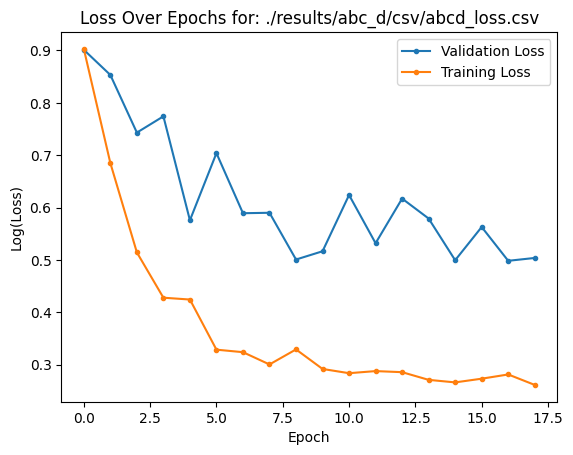

best loss for  ./results/abc_d/csv/abcd_loss.csv  for epoch  16 :  0.4984101561062476


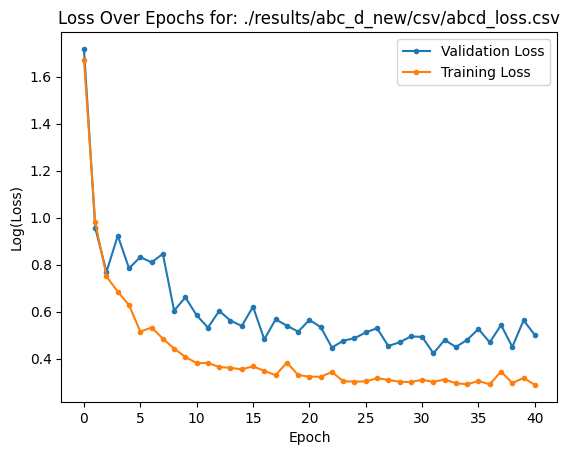

best loss for  ./results/abc_d_new/csv/abcd_loss.csv  for epoch  31 :  0.4226608862004736


In [5]:

files = ['./results/abc_d/csv/abcd_loss.csv', './results/abc_d_new/csv/abcd_loss.csv']
for file in files:    
    csv_filepath = file
    loss_data = pd.read_csv(csv_filepath)
    epochs = loss_data['epoch']
    val_loss = loss_data['val_loss']
    train_loss = loss_data['train_loss']

    #val_loss = np.log(val_loss)
    #train_loss = np.log(train_loss)

    plt.plot(epochs, val_loss, label='Validation Loss', marker='.')
    plt.plot(epochs, train_loss, label='Training Loss', marker='.')
    plt.xlabel('Epoch')
    plt.ylabel('Log(Loss)')
    title = 'Loss Over Epochs for: ' + csv_filepath
    plt.title(title)
    plt.legend()
    #plt.savefig('./results/abc_d/loss.png')
    plt.show()

    best_val_loss = float('inf')
    best_epoch = 0
    for epoch, val_loss in enumerate(loss_data['val_loss']):
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_epoch = epoch
    print("best loss for ", csv_filepath, " for epoch ", best_epoch, ": ", best_val_loss)

INSTRUCTION GROUND: open the drawer 
  at index:  [tensor([40]), tensor([104])]
[('grasp the handle of the drawer, then open it', tensor(0.8455, device='cuda:0')), ('grasp the handle of the drawer and open it', tensor(0.8304, device='cuda:0')), ('grasp the drawer handle, then open it', tensor(0.8256, device='cuda:0')), ('go open the drawer', tensor(0.8155, device='cuda:0')), ('grasp the drawer handle and open it', tensor(0.8146, device='cuda:0'))]


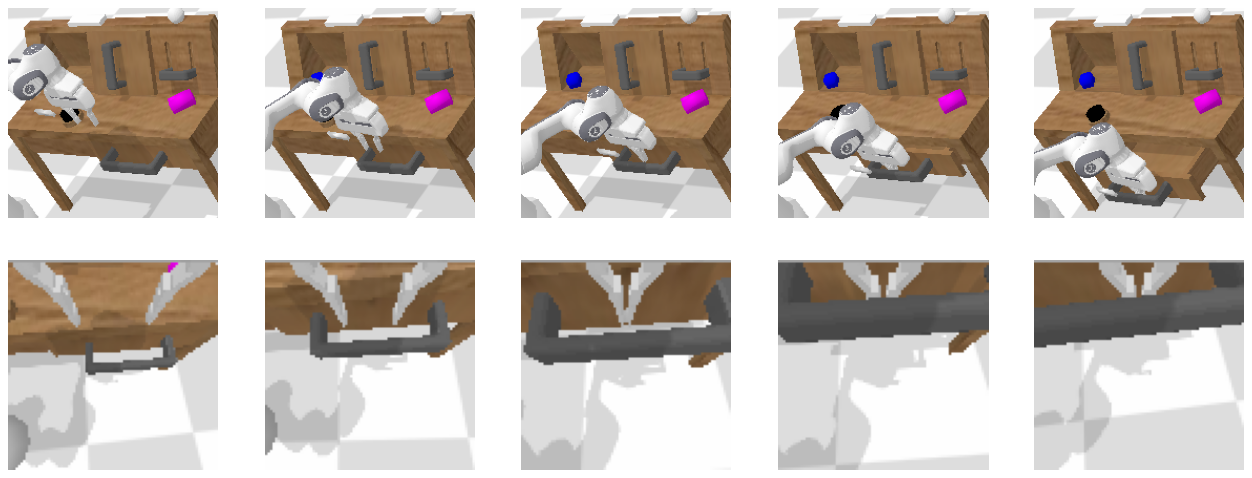

INSTRUCTION GROUND: grasp the handle of the drawer, then open it 
  at index:  [tensor([48]), tensor([112])]
[('grasp the handle of the drawer, then open it', tensor(0.8411, device='cuda:0')), ('grasp the handle of the drawer and open it', tensor(0.8265, device='cuda:0')), ('go open the drawer', tensor(0.8255, device='cuda:0')), ('grasp the drawer handle, then open it', tensor(0.8218, device='cuda:0')), ('grasp the drawer handle and open it', tensor(0.8113, device='cuda:0'))]


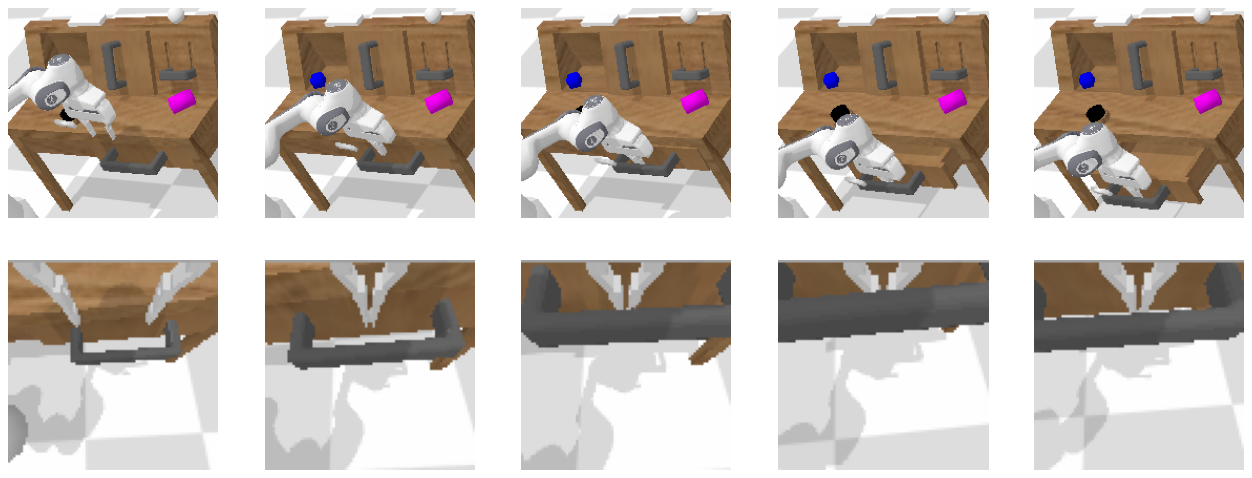

INSTRUCTION GROUND: toggle the button to turn on the led light 
  at index:  [tensor([152]), tensor([216])]
[('push the button to turn off the led light', tensor(0.7855, device='cuda:0')), ('push down the button to turn off the led light', tensor(0.7742, device='cuda:0')), ('push the button to turn off the led', tensor(0.7452, device='cuda:0')), ('push down the button to turn off the led', tensor(0.7290, device='cuda:0')), ('slide left the blue block', tensor(0.7071, device='cuda:0'))]


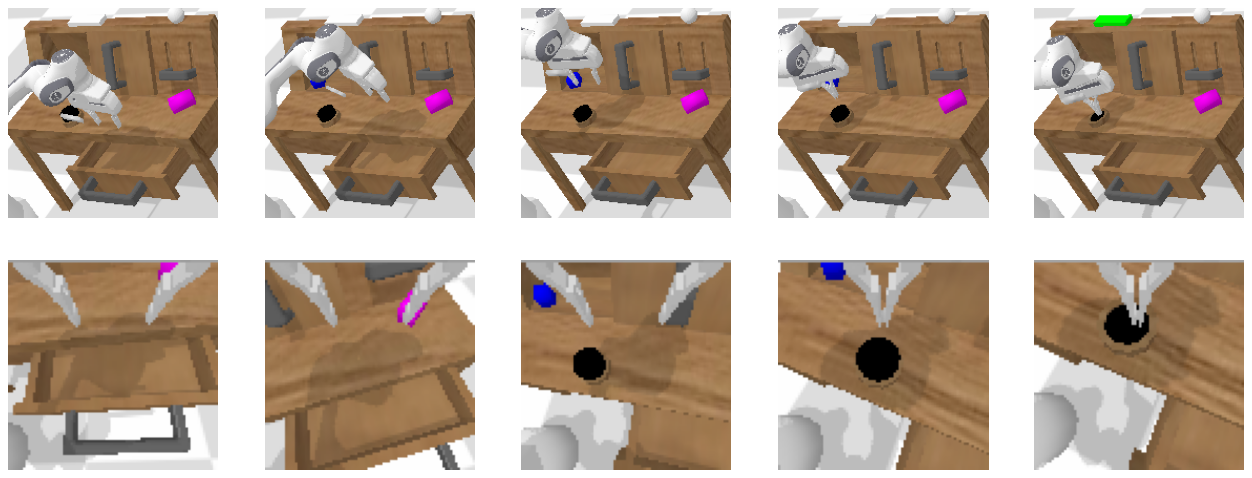

INSTRUCTION GROUND: push down the button to turn on the led light 
  at index:  [tensor([160]), tensor([224])]
[('slide the pink block to the left', tensor(0.7615, device='cuda:0')), ('slide left the pink block', tensor(0.7471, device='cuda:0')), ('push the pink block to the left', tensor(0.7451, device='cuda:0')), ('slide the blue block to the left', tensor(0.7417, device='cuda:0')), ('slide left the blue block', tensor(0.7074, device='cuda:0'))]


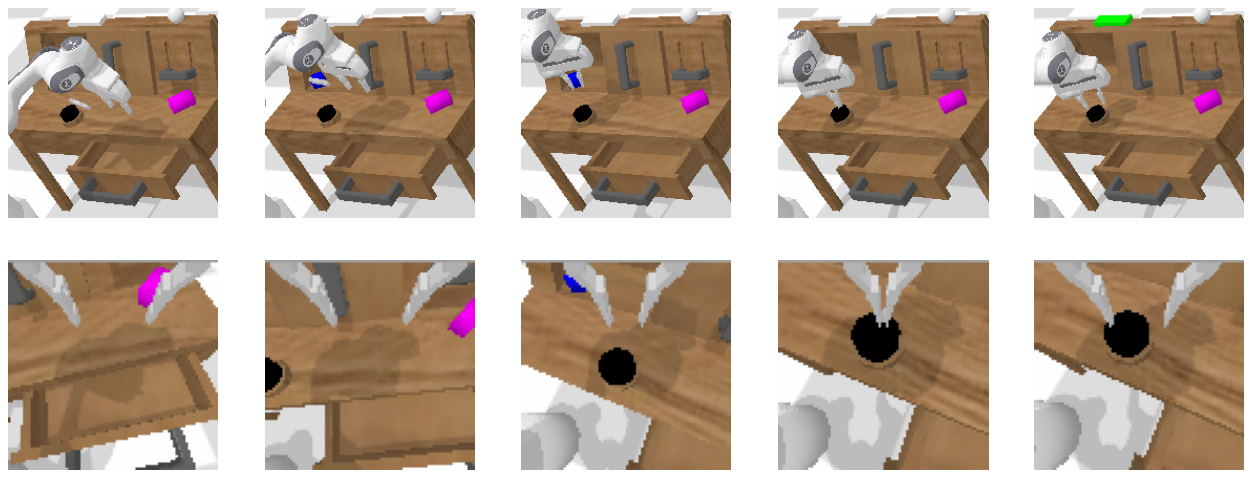

INSTRUCTION GROUND: lift the blue block lying in the sliding cabinet 
  at index:  [tensor([264]), tensor([328])]
[('grasp the blue block lying in the slider', tensor(0.8572, device='cuda:0')), ('grasp the blue block lying in the cabinet', tensor(0.8238, device='cuda:0')), ('grasp the blue block lying on the shelf', tensor(0.8110, device='cuda:0')), ('lift the blue block lying in the slider', tensor(0.7768, device='cuda:0')), ('in the slider grasp the blue block', tensor(0.7412, device='cuda:0'))]


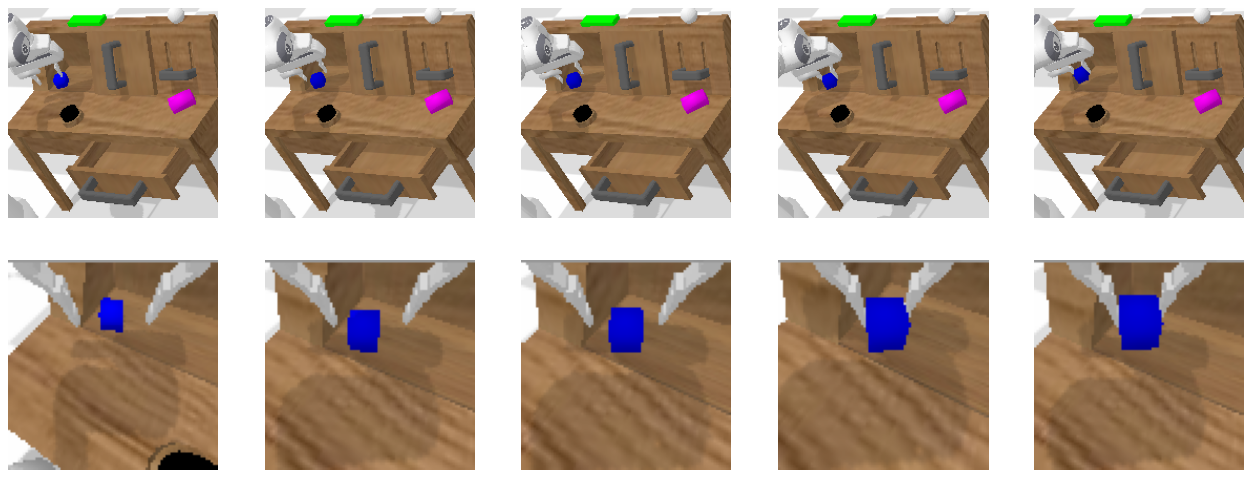

INSTRUCTION GROUND: in the sliding cabinet grasp the blue block 
  at index:  [tensor([272]), tensor([336])]
[('grasp the blue block lying in the slider', tensor(0.8575, device='cuda:0')), ('grasp the blue block lying in the cabinet', tensor(0.8222, device='cuda:0')), ('grasp the blue block lying on the shelf', tensor(0.8099, device='cuda:0')), ('lift the blue block lying in the slider', tensor(0.7810, device='cuda:0')), ('in the slider grasp the blue block', tensor(0.7455, device='cuda:0'))]


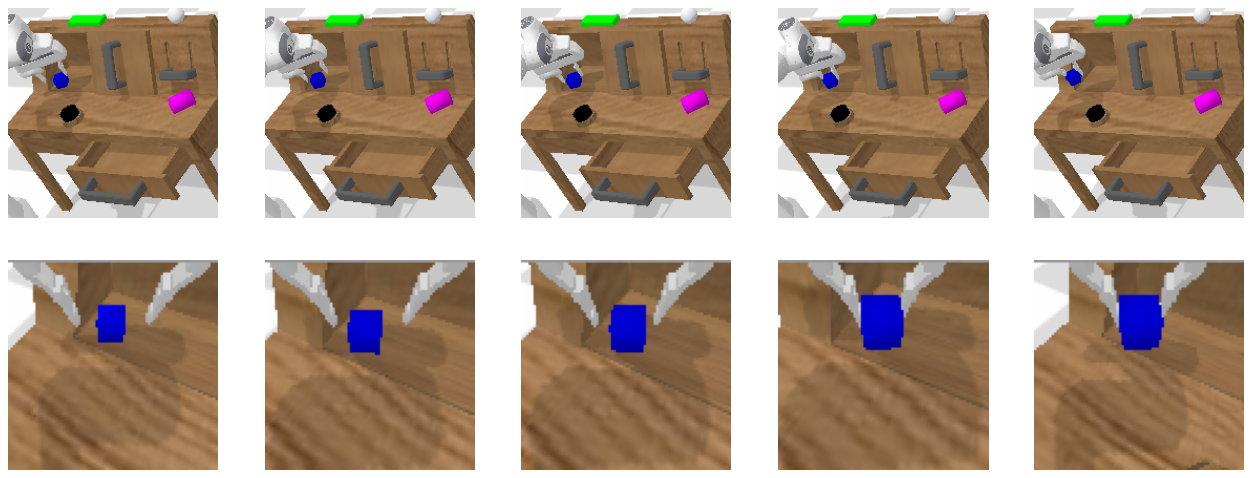

INSTRUCTION GROUND: grasp the door handle and slide the door to the left 
  at index:  [tensor([376]), tensor([440])]
[('slide the door to the left, then let it go', tensor(0.7956, device='cuda:0')), ('slide the object into the drawer', tensor(0.7639, device='cuda:0')), ('slide left the blue block', tensor(0.7326, device='cuda:0')), ('push the door to the left', tensor(0.7065, device='cuda:0')), ('slide the door to the left', tensor(0.6892, device='cuda:0'))]


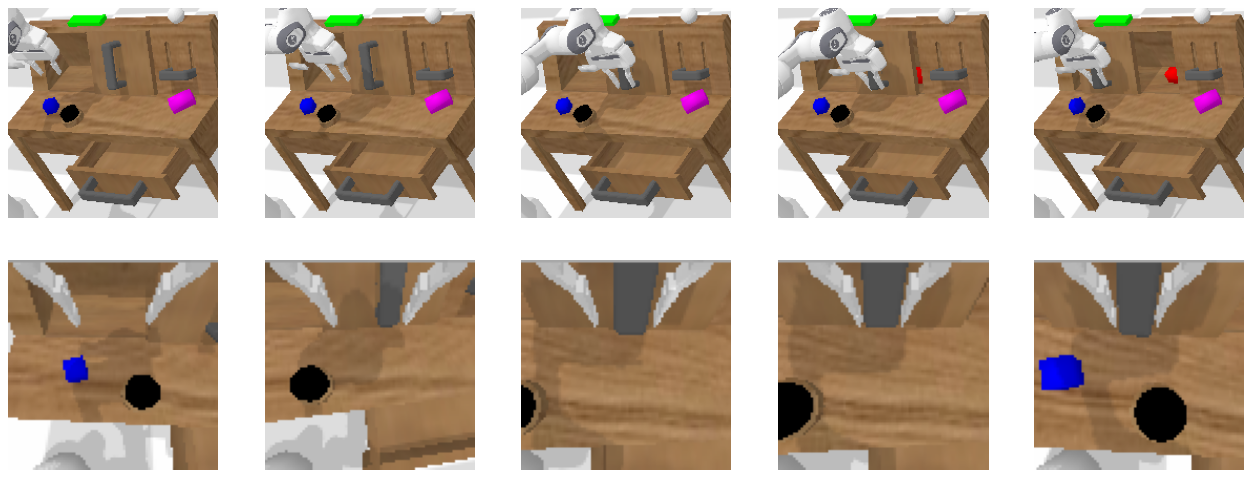

INSTRUCTION GROUND: move the door all the way to the left 
  at index:  [tensor([384]), tensor([448])]
[('slide the blue block to the left', tensor(0.7829, device='cuda:0')), ('slide the object into the drawer', tensor(0.7797, device='cuda:0')), ('slide left the blue block', tensor(0.7713, device='cuda:0')), ('push the object into the drawer', tensor(0.7498, device='cuda:0')), ('push the blue block to the left', tensor(0.7404, device='cuda:0'))]


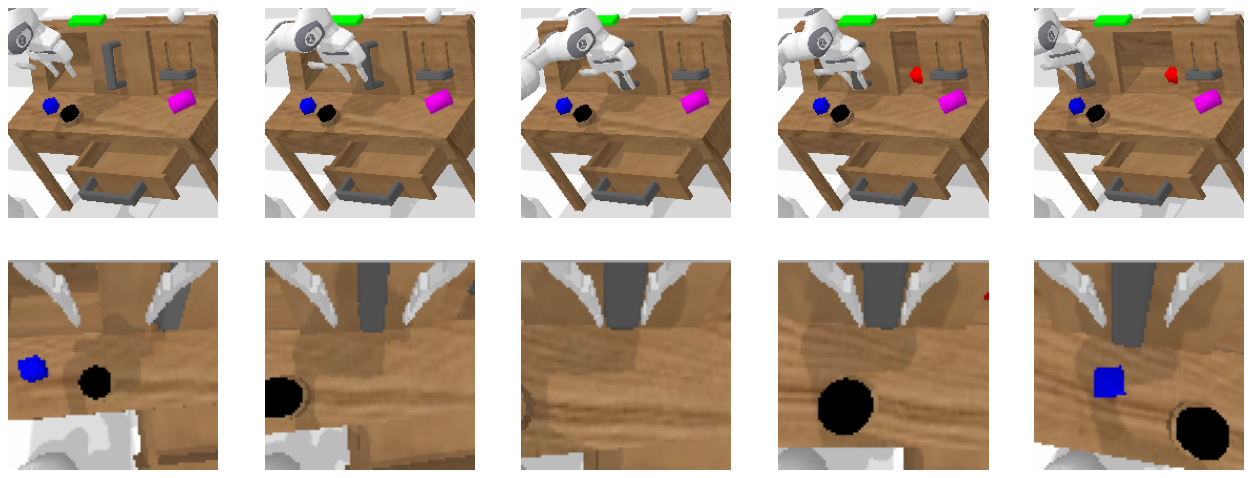

INSTRUCTION GROUND: pick up the red block from the sliding cabinet 
  at index:  [tensor([480]), tensor([544])]
[('grasp the pink block lying in the slider', tensor(0.8443, device='cuda:0')), ('in the slider grasp the pink block', tensor(0.8115, device='cuda:0')), ('grasp the pink block lying in the cabinet', tensor(0.8044, device='cuda:0')), ('grasp the pink block lying on the shelf', tensor(0.7917, device='cuda:0')), ('lift the pink block lying in the slider', tensor(0.7856, device='cuda:0'))]


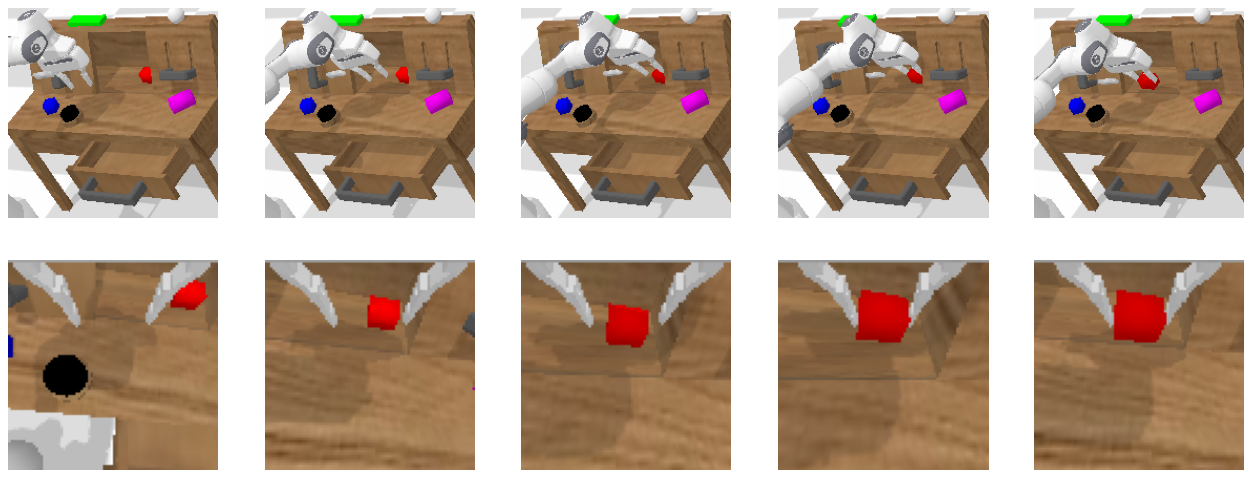

INSTRUCTION GROUND: store the object in the drawer 
  at index:  [tensor([536]), tensor([600])]
[('push the object into the drawer', tensor(0.8395, device='cuda:0')), ('slide the object into the drawer', tensor(0.7838, device='cuda:0')), ('sweep the object into the drawer', tensor(0.7673, device='cuda:0')), ('go slide the pink block to the right', tensor(0.7114, device='cuda:0')), ('go slide the pink block to the left', tensor(0.7046, device='cuda:0'))]


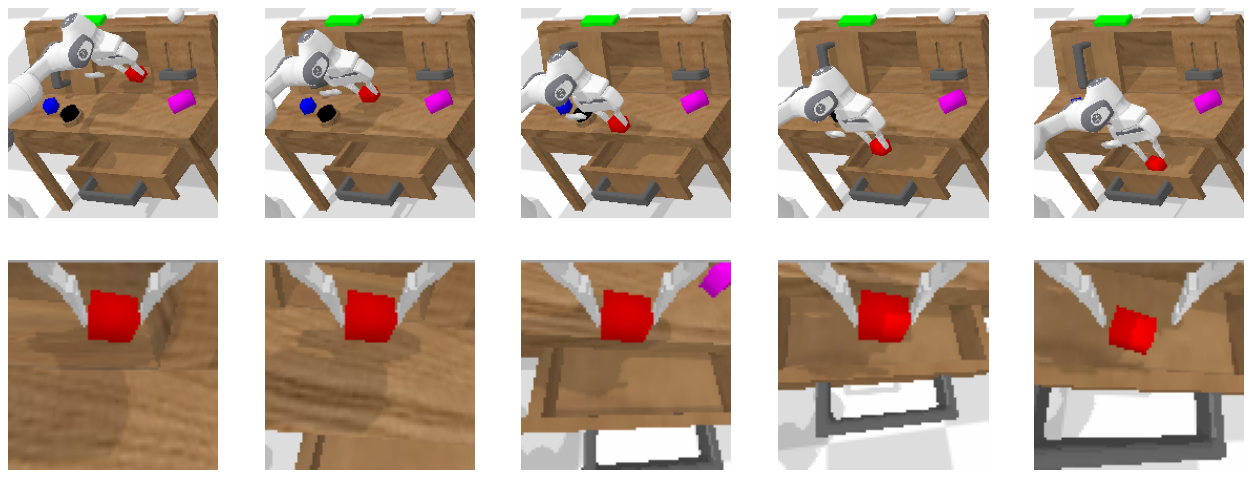

In [6]:
path_best = "./checkpoints/hulccap_abcd/run_3_new_stop/hulccap_abc_prefix-epoch-003-031.pt"
val_dataloader = DataLoader(val_dataset, batch_size=1, shuffle=False, num_workers=CFG.num_workers)


os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

clip_model, _ = clip.load("ViT-B/32", device=CFG.device, jit=True)
clip_text_encoder = clip_model.encode_text

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

best_model = ClipGeneralizedCaptionModel(prefix_length=10, clip_length=10).to(CFG.device)
best_model.load_state_dict(torch.load(path_best, map_location=CFG.device))
best_model = best_model.eval()

for data in itertools.islice(val_dataloader, 0, 10):

    instruction_ground = data.instruction
    index_ground = data.caption_index
    data.observations['D'] = data.observations['D'].to(CFG.device)
    data.actions['D'] = data.actions['D'].to(CFG.device)
    #data.state = data.state.to(CFG.device)
    data.gpt_tokens = data.gpt_tokens.to(CFG.device)
    data.gpt_mask = data.gpt_mask.to(CFG.device)

    for i in range(len(data.instruction)):
        print("INSTRUCTION GROUND:", instruction_ground[i], " at index: ", index_ground)  
        # print(data.observations.shape)
        # src = AttrDict(observations=data.observations, actions=data.actions, state=data.state)
        src = AttrDict(observations=data.observations['D'], actions=data.actions['D'])
        behaviour_encoding = best_model.behaviour_encoder(src)
        prefix_embed = best_model.project_to_gpt(behaviour_encoding)
        generated_caption =  beamsearch(best_model, tokenizer, prefix_embed)
        print(generated_caption)
        showImages(index_ground[0].item(), CFG.datapath_val)

In [ ]:
from utils.generating_captions import generate_annotation_abc
import yaml

model_path = "./checkpoints/hulccap_abcd/run_3_new_stop/hulccap_abc_prefix-epoch-003-031.pt"
datapath_val = CFG.datapath_val_abcd_parsed
csv_file = './results/abc_d/precision_recall_sim.csv'

#model_path = "./checkpoints/hulccap/run_4_rgb_gripper_and_static/hulccap_prefix-best.pt"
#datapath_val = CFG.datapath_val_parsed
#csv_file = './results/d_d_state/precision_recall.csv'

with open('ann.yaml', 'r') as ann_yaml:
    annotation_data = yaml.safe_load(ann_yaml)

thresholds = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]

predicted_captions = []

for data in tqdm(val_dataset):
    instruction = data.instruction
    for key, values in annotation_data.items():
        if instruction.rstrip('\n').strip() in values:
            instruction = key
    generated_annotation = generate_annotation_abc(data.caption_index[0], datapath_val, model_path)
    #print(generated_annotation)
    generated_annotation = generated_annotation[0]
    score = generated_annotation[1].item()
    caption = generated_annotation[0]
    for key, values in annotation_data.items():
        if caption.rstrip('\n').strip() in values:
            caption = key
    predicted_captions.append((instruction == caption, score))
    print(instruction)
    print(generated_annotation)
    print(caption)

results = []
for threshold in thresholds:
    tp = 0
    fp = 0
    fn = 0
    for is_correct, score in predicted_captions:
        if score >= threshold:
            if is_correct:
                tp += 1
            else:
                fp += 1
        elif is_correct:
            fn += 1

    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0   

    print(f"Threshold: {threshold}")
    print(f"TP: {tp}")
    print(f"FP: {fp}")
    print(f"FN: {fn}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    results.append([threshold, tp, fp, fn, recall, precision])

with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Threshold', 'TP', 'FP', 'FN', 'Recall', 'Precision'])
    for result in results:
        writer.writerow(result)

print(f"done, wrote results to {csv_file}")

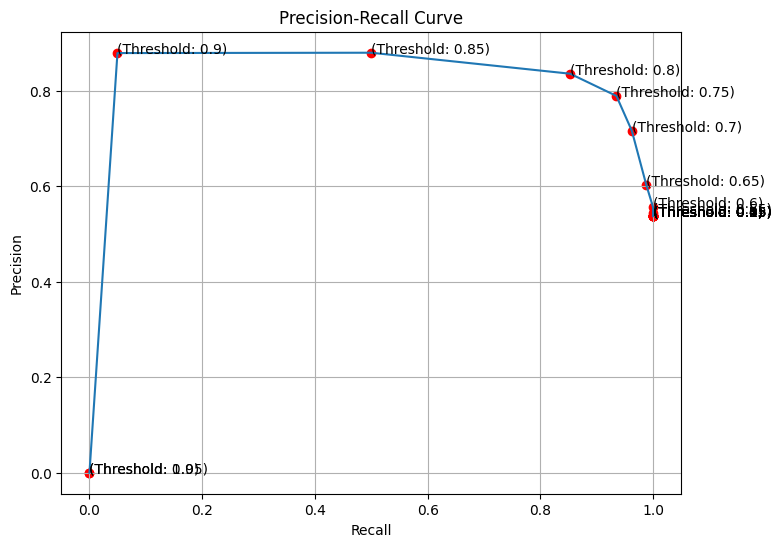

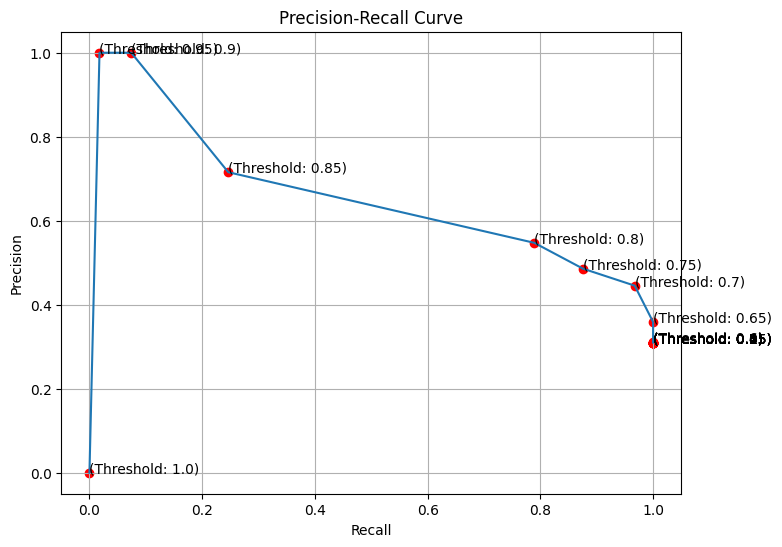

In [10]:
files =['./results/d_d/precision_recall.csv','./results/abc_d/precision_recall.csv', './results/abc_d/precision_recall_sim.csv']
for file in files :
    data = pd.read_csv(file)

    precision = data['Precision']
    recall = data['Recall']
    thresholds = data['Threshold']

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    for i, threshold in enumerate(thresholds):
        plt.scatter(recall[i], precision[i], marker='o', color='red')
        plt.text(recall[i], precision[i], f'(Threshold: {threshold})')

    plt.grid(True)
    plt.show()